In [1]:
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
from pycalphad.core.lower_convex_hull import lower_convex_hull
import pycalphad.variables as v

In [2]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4', 'FCC_A1', 'B2_BCC']

In [3]:
%time eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (0.01,1,0.01), v.T: 1400.})
print(eq)

Components: AL FE VA
Phases: AL13FE4 AL2FE AL5FE2 AL5FE4 B2_BCC FCC_A1 HCP_A3 LIQUID [done]
Computing initial grid [100 points, 10.1KB]
Computing convex hull [iteration 1]
progress 6.919479062432842e+264
Refining convex hull
Rebuilding grid [1288 points, 128.9KB]
Computing convex hull [iteration 2]
progress 18136.0635728896
Refining convex hull
Rebuilding grid [2476 points, 247.7KB]
Computing convex hull [iteration 3]
progress 12398.310789027804
Refining convex hull
Rebuilding grid [3664 points, 366.5KB]
Computing convex hull [iteration 4]
progress 4774.671408329887
Refining convex hull
Rebuilding grid [4852 points, 485.3KB]
Computing convex hull [iteration 5]
progress 2869.6625271142693
Refining convex hull
Rebuilding grid [6040 points, 604.1KB]
Computing convex hull [iteration 6]
progress 1328.7444867699523
Refining convex hull
Rebuilding grid [7228 points, 722.9KB]
Computing convex hull [iteration 7]
progress 1196.3957630854566
Refining convex hull
Rebuilding grid [8416 points, 841.

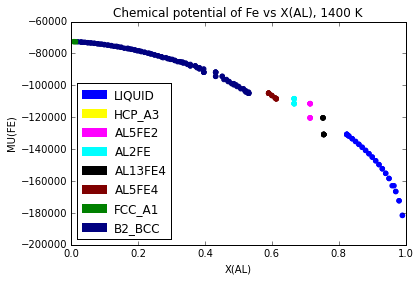

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1400 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p.values)] for p in eq.Phase.sel(T=1400, vertex=0)]
plt.scatter(eq.X.sel(T=1400, component='AL', vertex=0), eq.MU.sel(T=1400, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p.values)] for p in eq.Phase.sel(T=1400, vertex=1)]
plt.scatter(eq.X.sel(T=1400, component='AL', vertex=1), eq.MU.sel(T=1400, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')

In [6]:
%%time
eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe,
    {v.X('AL'): 0.2, v.T: (300, 1400, 100)})
print(eq)

Components: AL FE VA
Phases: AL13FE4 AL2FE AL5FE2 AL5FE4 B2_BCC FCC_A1 HCP_A3 LIQUID [done]
Computing initial grid [100 points, 102.1KB]
Computing convex hull [iteration 1]
progress 127440.16718150636
Refining convex hull
Rebuilding grid [112 points, 114.4KB]
Computing convex hull [iteration 2]
progress 8654.212608444781
Refining convex hull
Rebuilding grid [124 points, 126.6KB]
Computing convex hull [iteration 3]
progress 6268.35252851581
Refining convex hull
Rebuilding grid [136 points, 138.9KB]
Computing convex hull [iteration 4]
progress 6355.910327283316
Refining convex hull
Rebuilding grid [148 points, 151.1KB]
Computing convex hull [iteration 5]
progress 3244.3730255085393
Refining convex hull
Rebuilding grid [160 points, 163.3KB]
Computing convex hull [iteration 6]
progress 1524.5514223931677
Refining convex hull
Rebuilding grid [172 points, 175.6KB]
Computing convex hull [iteration 7]
progress 864.7880344600417
Refining convex hull
Rebuilding grid [184 points, 187.8KB]
Computi

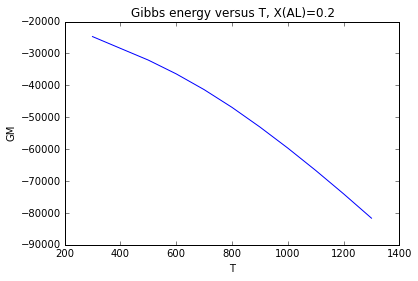

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gca().set_title('Gibbs energy versus T, X(AL)=0.2')
plt.gca().set_xlabel('T')
plt.gca().set_ylabel('GM')
plt.plot(eq['T'], eq.GM.sel(X_AL=0.2))